<a href="https://colab.research.google.com/github/italolima04/data-science/blob/master/COVID_BRASIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
dt = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')

In [31]:
dt 

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-14,MG,Abaeté,city,1,0,True,23237.0,3100203.0,4.30348,NaN
1,2020-04-14,MG,Alfenas,city,1,0,True,79996.0,3101607.0,1.25006,NaN
2,2020-04-14,MG,Alpercata,city,1,0,True,7424.0,3101805.0,13.46983,NaN
3,2020-04-14,MG,Araguari,city,7,0,True,117267.0,3103504.0,5.96928,NaN
4,2020-04-14,MG,Araxá,city,1,0,True,106229.0,3104007.0,0.94136,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13716,2020-02-27,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,NaN
13717,2020-02-26,SP,São Paulo,city,1,0,False,12252023.0,3550308.0,0.00816,NaN
13718,2020-02-26,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,NaN
13719,2020-02-25,SP,São Paulo,city,1,0,False,12252023.0,3550308.0,0.00816,NaN


In [32]:
#Função do Python para filtrar features específicas e armazená-los em um novo DataFrame
states = dt.loc[dt.place_type== 'state', :]
#states.drop(columns=['city'])
states.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
108,2020-04-14,MG,NaN,state,884,27,True,21168791.0,31.0,4.17596,0.0305
115,2020-04-13,AC,NaN,state,90,3,True,881935.0,12.0,10.20483,0.0333
121,2020-04-13,AL,NaN,state,58,4,True,3337357.0,27.0,1.73790,0.0690
141,2020-04-13,AM,NaN,state,1275,71,True,4144597.0,13.0,30.76294,0.0557
145,2020-04-13,AP,NaN,state,244,6,True,845731.0,16.0,28.85078,0.0246


In [19]:
#Método para verificar os objetos únicos no DataFrame, nesse caso são os Estados
states.state.unique()

array(['MG', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO', 'RN', 'RO'], dtype=object)

In [21]:
#Método para verificar a quantidade de objetos únicos, nesse caso o número de estados, que é equivalente ao número de estados do Brasil.
len(states.state.unique())

27

In [0]:
#Método para Desestruturar um DataFrame e selecionar apenas as colunas de interesse, criando um novo DataFrame
data = states[['date', 'state', 'confirmed', 'deaths', 'is_last']]

In [34]:
data.head()

,date,state,confirmed,deaths,is_last
108,2020-04-14,MG,884,27,True
115,2020-04-13,AC,90,3,True
121,2020-04-13,AL,58,4,True
141,2020-04-13,AM,1275,71,True
145,2020-04-13,AP,244,6,True


In [0]:
covid = pd.DataFrame()

In [35]:
#Criaçã ode variáveis locais p/ manipulação futura.
state = "SP"
situation = "confirmed"


,date,state,confirmed,deaths,is_last
1124,2020-04-13,SP,8895,608,True
2142,2020-04-12,SP,8755,588,False
3127,2020-04-11,SP,8419,560,False
4070,2020-04-10,SP,8216,540,False
4940,2020-04-09,SP,7480,496,False


In [53]:
#Criação de novo DataFrame correlacionando apenas um estado em específico (Variável Local State)
data_state =  data.loc[data.state == state, :]
data_state.head()

,date,state,confirmed,deaths,is_last
1124,2020-04-13,SP,8895,608,True
2142,2020-04-12,SP,8755,588,False
3127,2020-04-11,SP,8419,560,False
4070,2020-04-10,SP,8216,540,False
4940,2020-04-09,SP,7480,496,False


In [54]:
#Reestruturar DataFrame agrupando as variáveis de Data e o Somatório de Casos Confirmados, mostrando uma evolução ao longo dos dias
data_state = data_state.groupby('date').sum()[situation].reset_index()
data_state

,date,confirmed
0,2020-02-25,1
1,2020-02-26,1
2,2020-02-27,1
3,2020-02-28,2
4,2020-02-29,2
5,2020-03-01,2
6,2020-03-02,2
7,2020-03-03,2
8,2020-03-04,3
9,2020-03-05,6


In [0]:
#Removendo a coluna Date por questão de influência no estudo.
data_state = data_state.drop(columns=['date'])


In [57]:
#Renomeando a coluna no DataFrame, exibindo o Estado correspondente
data_state.columns = [state]
data_state

,SP
0,1
1,1
2,1
3,2
4,2
5,2
6,2
7,2
8,3
9,6


In [68]:
#Concatenando dois DataFrames
covid = pd.concat([covid, data_state], ignore_index=False, axis=1)
covid

,SP
0,1
1,1
2,1
3,2
4,2
5,2
6,2
7,2
8,3
9,6


In [74]:
#Forma de Resetar o DataFrame #Gambiarra
covid = pd.DataFrame()
covid

""


In [76]:
#Processo Geral p/ Criação do DataFrame com os número de casos por estados e os dias respectivos:

#Defino o Estado e Tipo de Caso
state = "RJ"
situation = "confirmed"
#Manipulo o DataFrame para relacionar somente o estado, com o número acumulado de casos confirmados
data_state =  data.loc[data.state == state, :]
data_state = data_state.groupby('date').sum()[situation].reset_index()
#Retiro a Coluna de Date e renomeio a coluna com a Sigla do Estado
data_state = data_state.drop(columns=['date'])
data_state.columns = [state]
#Faço a concatenação entre o DataFrame covid e o data_state com o estado
covid = pd.concat([covid, data_state], ignore_index=False, axis=1)
covid


,SP,RJ
0,1,1.0
1,1,2.0
2,1,3.0
3,2,15.0
4,2,24.0
5,2,25.0
6,2,63.0
7,2,66.0
8,3,119.0
9,6,186.0


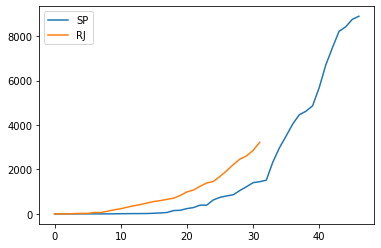

In [77]:
covid.plot()

In [0]:
#Processo Geral p/ Criação do DataFrame com os número de casos por estados e os dias respectivos, função Generalizada:
def since_the_first (data, states, days, situation):

  covid = pd.DataFrame()

  for state in states:
    try:
       data_state =  data.loc[data.state == state, : ]
       data_state = data_state.groupby('date').sum()[situation].reset_index()
       data_state = data_state.drop(columns=['date'])
       data_state.columns = [state]
       covid = pd.concat([covid, data_state], ignore_index=False, axis=1)

    except: 
      print('Is not ' + situation + 'in' + state)

  covid.columns = states

  return covid.head(days)

In [105]:
#Casos Confirmados em comparação nos três estados, SP, RJ E CE
data_state = since_the_first(data, ['SP', 'RJ', 'CE'], 46, 'confirmed')
data_state


,SP,RJ,CE
0,1,1.0,9.0
1,1,2.0,10.0
2,1,3.0,19.0
3,2,15.0,24.0
4,2,24.0,68.0
5,2,25.0,84.0
6,2,63.0,125.0
7,2,66.0,164.0
8,3,119.0,185.0
9,6,186.0,211.0


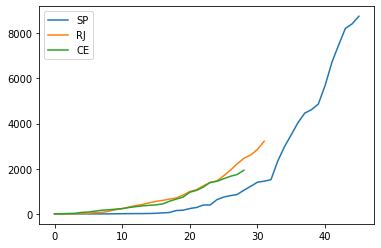

In [106]:
#Método p/ gerar Gráfico linear
data_state.plot()

In [103]:
#Mortes em comparação nos três estados, SP, RJ E CE
data_state = since_the_first(data, ['SP', 'RJ', 'CE'], 46, 'deaths')
data_state

,SP,RJ,CE
0,0,0.0,0.0
1,0,0.0,0.0
2,0,0.0,0.0
3,0,0.0,0.0
4,0,0.0,0.0
5,0,0.0,0.0
6,0,0.0,0.0
7,0,2.0,0.0
8,0,3.0,0.0
9,0,3.0,0.0


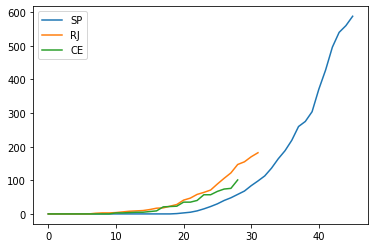

In [104]:
data_state.plot()

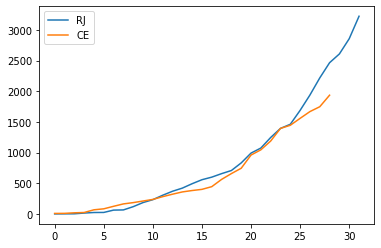

In [109]:
data_state = since_the_first(data, ['RJ', 'CE'], 46, 'confirmed')
data_state.plot()

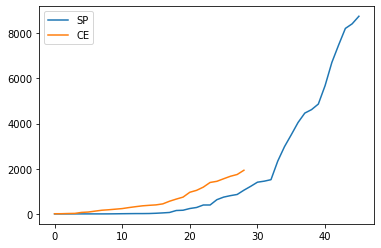

In [110]:
data_state = since_the_first(data, ['SP', 'CE'], 46, 'confirmed')
data_state.plot()